# Predicting News Category 

  - This project about Predicting categories of News

  - The dataset for this project is from MachinHack Hackathon.

  - Dataset contains 7,628 entries of 4 types

  - This dataset contains News of 4 types:
      - 1.Politics
      - 2.Technology
      - 3.Entertainment
      - 4.Business

#### Natural Language Processing is used to predict genre or category of news

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df = pd.read_excel("Data_Train.xlsx")
print('Entries:',df.shape[0])
df.head()

Entries: 7628


,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [3]:
#Cheacking for Null values
df.isnull().any()

STORY      False
SECTION    False
dtype: bool

In [4]:
#Getting Unique values
df['SECTION'].unique()

array([3, 0, 1, 2])

In [5]:
#Counts of each types
df['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

<AxesSubplot:>

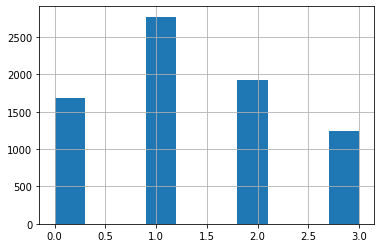

In [6]:
#Plotting SECTIONs
df['SECTION'].hist()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer

/home/niraj/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [8]:
# copy text 
text = df.copy()
print(text.shape)
text.head()

(7628, 2)


,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/niraj/snap/jupyter/6/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data Preprocessing

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus=[]
for i in range(0, len(text)):
    # Removing symbols from text
    review = re.sub('[^a-zA-Z]'," ",text['STORY'][i])
    # Converting text to lower
    review = review.lower()
    # Spliting data
    review = review.split()
    # Removing Stopwords 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus[2]

'asian currenc trade lower today south korean china renminbi china offshor malaysian ringgit indonesian rupiah taiwan dollar howev japanes yen dollar index measur us currenc strength major currenc trade previou close'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#implement Bag of Words
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [20]:
# Dependent Variable
X.shape

(7628, 5000)

In [21]:
#Dependent Variable
y=df['SECTION']

# MODEL 

In [22]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

# Creating Model
lg = LogisticRegression()

# fitting Model
lg.fit(X_train,y_train)

#Prediction
y_pred = lg.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Accuracy of model
score = accuracy_score(y_pred,y_test)
print('Accuracy Score:',score)
# Confusion matrix
matrix = confusion_matrix(y_pred,y_test)
print('\nConfusion Matrix:\n',matrix)
# Classification report
report = classification_report(y_pred,y_test)
print('\nClassification Report:\n',report)

Accuracy Score: 0.971803018268467

Confusion Matrix:
 [[550   2   7   1]
 [ 17 891   4  14]
 [  7   9 614   4]
 [  2   4   0 392]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       560
           1       0.98      0.96      0.97       926
           2       0.98      0.97      0.98       634
           3       0.95      0.98      0.97       398

    accuracy                           0.97      2518
   macro avg       0.97      0.97      0.97      2518
weighted avg       0.97      0.97      0.97      2518



## Support Vector Machines

In [25]:
from sklearn.svm import SVC

# Creating Model
svm =SVC()

# fitting Model
svm.fit(X_train,y_train)

#Prediction
y_pred = svm.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Accuracy of model
score = accuracy_score(y_pred,y_test)
print('Accuracy Score:',score)
# Confusion matrix
matrix = confusion_matrix(y_pred,y_test)
print('\nConfusion Matrix:\n',matrix)
# Classification report
report = classification_report(y_pred,y_test)
print('\nClassification Report:\n',report)

Accuracy Score: 0.9710087370929309

Confusion Matrix:
 [[548   3   9   0]
 [ 20 892   3  15]
 [  7   7 613   4]
 [  1   4   0 392]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       560
           1       0.98      0.96      0.97       930
           2       0.98      0.97      0.98       631
           3       0.95      0.99      0.97       397

    accuracy                           0.97      2518
   macro avg       0.97      0.97      0.97      2518
weighted avg       0.97      0.97      0.97      2518



## Naive Bayes classifier

In [27]:
from sklearn.naive_bayes import MultinomialNB
# Crating Model
classifier = MultinomialNB()
#Fitting Model
classifier.fit(X_train,y_train)
# Predicting
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Accuracy of model
score = accuracy_score(y_pred,y_test)
print('Accuracy Score:',score)
# Confusion matrix
matrix = confusion_matrix(y_pred,y_test)
print('\nConfusion Matrix:\n',matrix)
# Classification report
report = classification_report(y_pred,y_test)
print('\nClassification Report:\n',report)

Accuracy Score: 0.965845909451946

Confusion Matrix:
 [[553   5  16   2]
 [ 16 883  12  10]
 [  2   7 597   0]
 [  5  11   0 399]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       576
           1       0.97      0.96      0.97       921
           2       0.96      0.99      0.97       606
           3       0.97      0.96      0.97       415

    accuracy                           0.97      2518
   macro avg       0.97      0.97      0.97      2518
weighted avg       0.97      0.97      0.97      2518



## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Creating Model
rf = RandomForestClassifier()

# fitting Model
rf.fit(X_train,y_train)

#Prediction
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Accuracy of model
score = accuracy_score(y_pred,y_test)
print('Accuracy Score:',score)
# Confusion matrix
matrix = confusion_matrix(y_pred,y_test)
print('\nConfusion Matrix:\n',matrix)
# Classification report
report = classification_report(y_pred,y_test)
print('\nClassification Report:\n',report)

Accuracy Score: 0.9412231930103256

Confusion Matrix:
 [[537   5  19   4]
 [ 22 864  12  15]
 [ 14  24 593  16]
 [  3  13   1 376]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       565
           1       0.95      0.95      0.95       913
           2       0.95      0.92      0.93       647
           3       0.91      0.96      0.94       393

    accuracy                           0.94      2518
   macro avg       0.94      0.94      0.94      2518
weighted avg       0.94      0.94      0.94      2518

